In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/emails.csv')

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df = df.rename(columns={'text':'Email'})
df = df.rename(columns={'spam':'Target'})

In [5]:
df

,Email,Target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
df.isnull().sum()

,0
Email,0
Target,0


In [7]:
df.duplicated().sum()

33

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(5695, 2)

In [11]:
df['Target'].value_counts()

,count
Target,
0,4327
1,1368


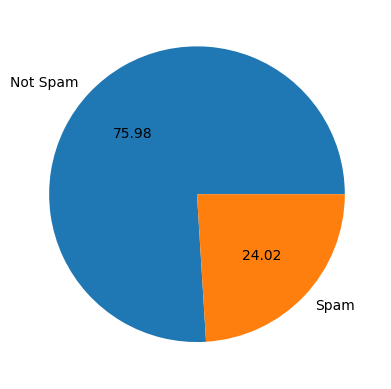

In [12]:
plt.pie(df['Target'].value_counts(),labels=['Not Spam','Spam'],autopct='%0.2f')
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
df['num_of_characters'] = df['Email'].apply(len)

In [17]:
df.head()

,Email,Target,num_of_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [18]:
df['num_of_words'] = df['Email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df.head()

,Email,Target,num_of_characters,num_of_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [20]:
df['num_of_sentences'] = df['Email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,Email,Target,num_of_characters,num_of_words,num_of_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [22]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [23]:
df[df['Target']==1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [24]:
df[df['Target']==0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


<Axes: xlabel='num_of_characters', ylabel='Count'>

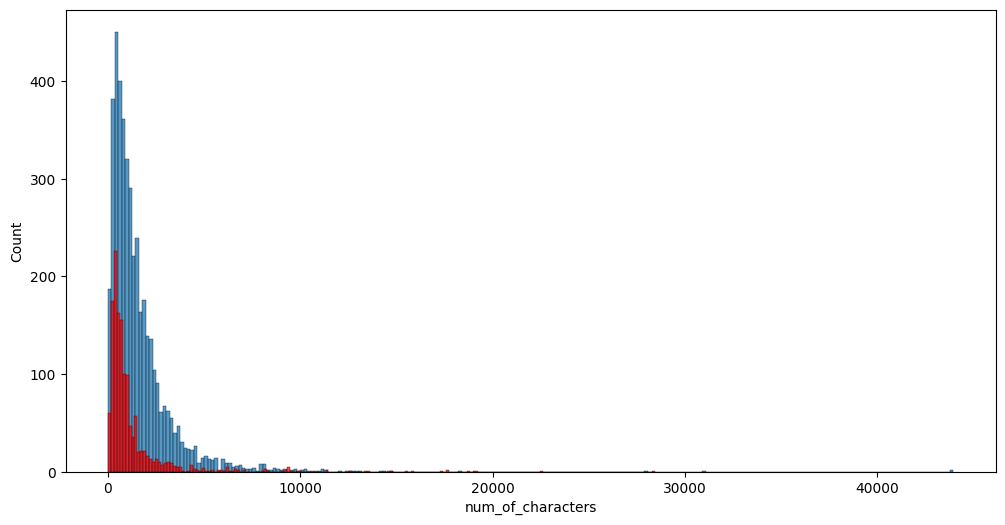

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_of_characters'])
sns.histplot(df[df['Target']==1]['num_of_characters'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

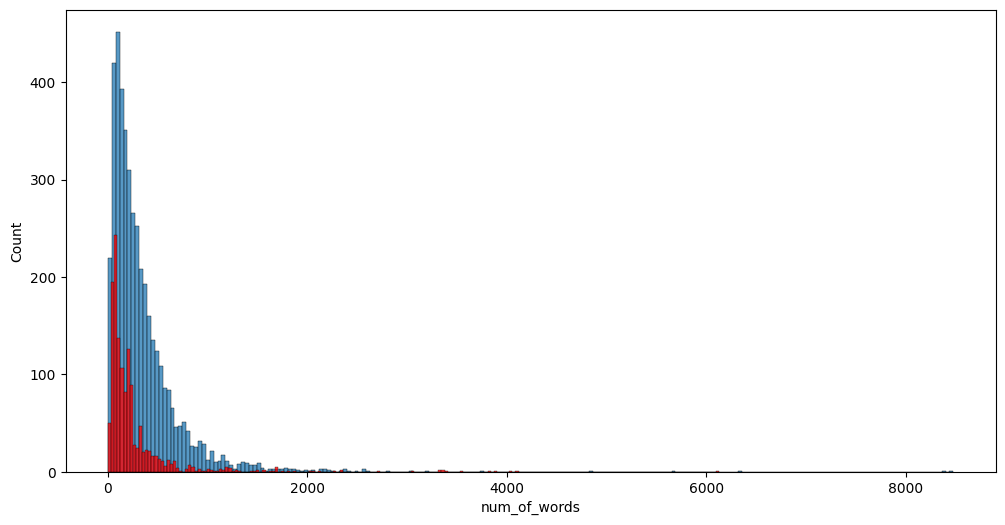

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_of_words'])
sns.histplot(df[df['Target']==1]['num_of_words'],color='red')

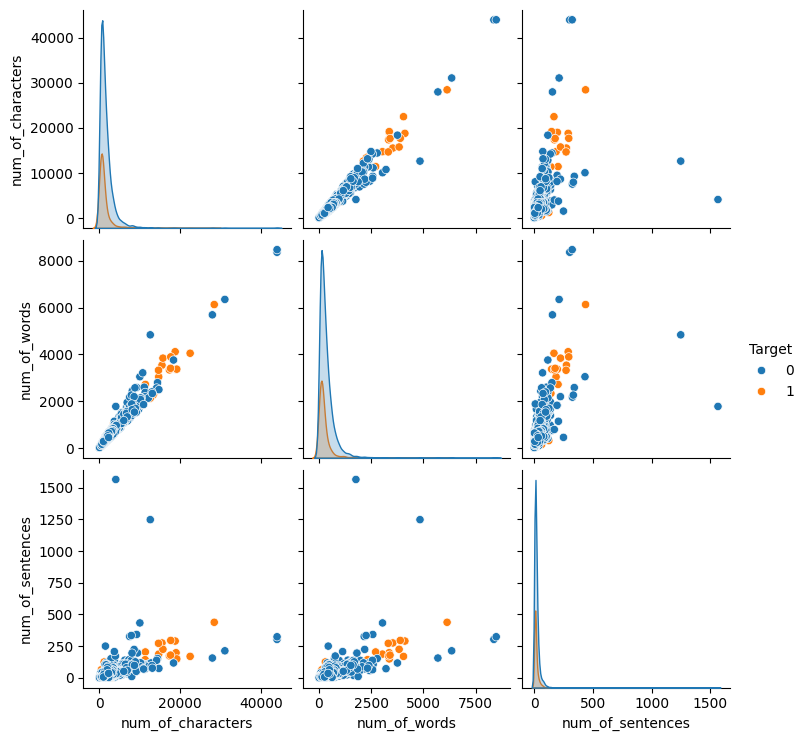

In [27]:
sns.pairplot(df,hue='Target')

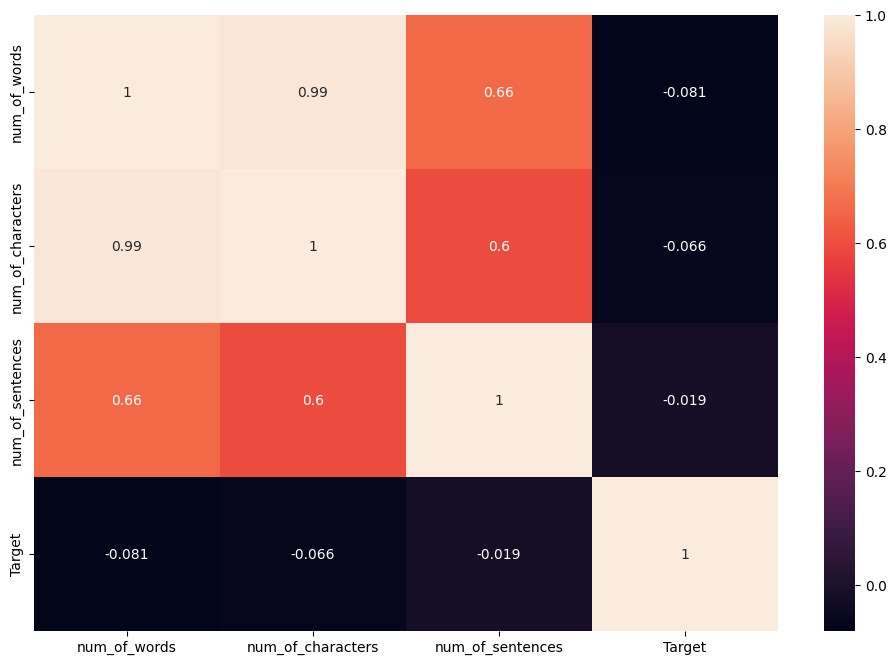

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['num_of_words', 'num_of_characters', 'num_of_sentences', 'Target']].corr(), annot=True)
plt.show()

In [29]:
nltk.download('stopwords')
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [31]:
transform_text("I'm good person in someone life.")


'good person someon life'

In [32]:
df['Email'][10]

"Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . "

In [33]:
ps = PorterStemmer()
ps.stem('Institution')

'institut'

In [34]:
df['transformed_email'] = df['Email'].apply(transform_text)

In [35]:
df['transformed_email'][0]

'subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest'

In [36]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_email'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [37]:
len(spam_corpus)

174630

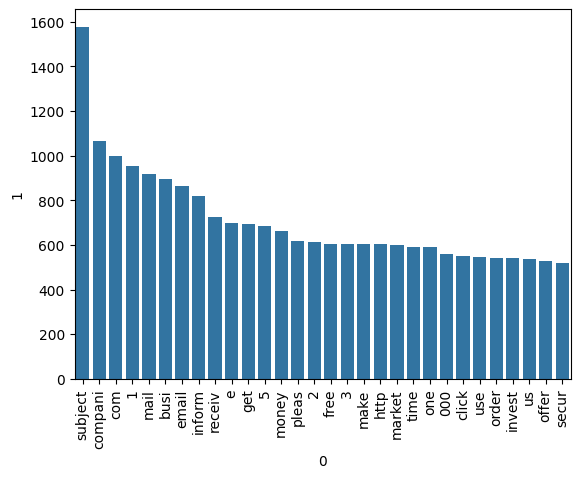

In [38]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Use the 'x' and 'y' arguments to specify the columns for the bar plot.
sns.barplot(x=spam_df[0], y=spam_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
not_spam_corpus = []
for msg in df[df['Target'] == 0]['transformed_email'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [40]:
len(not_spam_corpus)

702991

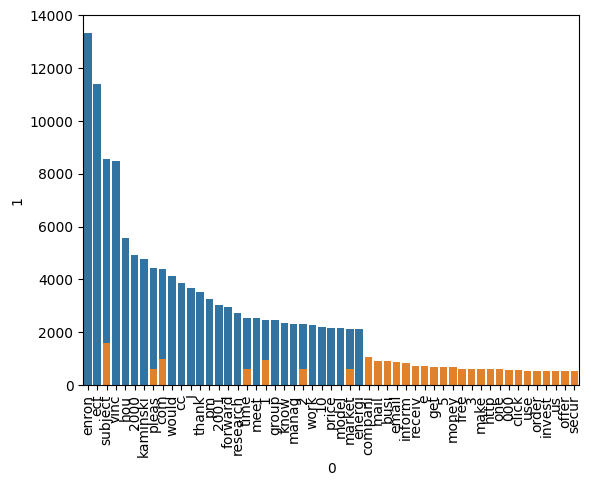

In [41]:
sns.barplot(x=pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1])
sns.barplot(x=spam_df[0], y=spam_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
df.head()

,Email,Target,num_of_characters,num_of_words,num_of_sentences,transformed_email
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [43]:
X = df['transformed_email']
Y = df['Target']

In [44]:
Y

,Target
0,1
1,1
2,1
3,1
4,1
...,...
5723,0
5724,0
5725,0
5726,0


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [58]:
X_train.shape

(4556,)

In [59]:
X_test.shape

(1139,)

In [60]:
Y_train.shape

(4556,)

In [61]:
Y_test.shape

(1139,)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

X_train.shape


(4556, 3000)

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [65]:
nb.fit(X_train, Y_train)

MultinomialNB()

In [67]:
len(X_test.toarray())

1139

In [68]:
len(X_test.toarray()[0])

3000

In [69]:
y_pred = nb.predict(X_test)

In [70]:
print("Testing Accuracy:")
accuracy_score(y_pred, Y_test)

Testing Accuracy:


0.9798068481123793

In [71]:
print("Training Accuracy:")
nb.score(X_train,Y_train)

Training Accuracy:


0.9863915715539947

**Compare the Results:**

---



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['transformed_email'], df['Target'], test_size=0.2, random_state=0)

tfidf = TfidfVectorizer(max_features=3000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Naive Bayes Model and SVM Classifier

In [73]:
#1.
nb = MultinomialNB()
nb.fit(X_train_tfidf, Y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Classification Report:")
print(classification_report(Y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(Y_test, y_pred_nb))

#2.
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, Y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("\nSVM Classification Report:")
print(classification_report(Y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(Y_test, y_pred_svm))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       870
           1       0.98      0.93      0.96       269

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139

Naive Bayes Accuracy: 0.9798068481123793

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       870
           1       0.99      0.98      0.99       269

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

SVM Accuracy: 0.9929762949956101


In [74]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [75]:
clean_email = cv.transform(email)

In [76]:
len(clean_email.toarray()[0])

25792

In [83]:
email = input("Enter the email: ").strip()  # strip() removes any extra whitespace

# Check if the input email is non-empty
if len(email) == 0:
    print("Error: The email content cannot be empty. Please enter a valid email.")
else:
    # Transform the input email using the trained TF-IDF vectorizer
    clean_email = tfidf.transform([email])

    # Predict whether it's spam or not
    check = nb.predict(clean_email)[0]

    if check == 0:
        print("This is a Ham Email!")
    else:
        print("This is a Spam Email!")


Enter the email: Congratulations! You have won a $1000 gift card! Click the link below to claim your prize now.  Hurry up! This offer expires soon. http://spamwebsite.com/win  Regards, The Prize Team
This is a Spam Email!
